In [ ]:
!pip install scikeras

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
import matplotlib as mpl


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparación de datos

In [ ]:
import os

import numpy as np
from PIL import Image
def load_images_from_dir(directory):
    # Initialize empty lists for images and labels
    images = []
    labels = []

    # Leemos las imagenes en el directorio
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load image and convert to rgb
            img = Image.open(os.path.join(directory, filename)).convert('RGB')
            if img.size != (224, 224):
                img = img.resize((224, 224))
            img_array = np.array(img)

            # Add image and label to lists
            images.append(img_array)
            labels.append(filename.split('-')[0])

    # Convert lists to numpy arrays
    images_array = np.array(images, dtype=np.uint8)
    labels_array = np.array(labels)

    return images_array, labels_array


In [ ]:
## Solo correr una vez
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random

# Directorio que contiene todas las imágenes
image_directory = '/content/drive/MyDrive/Proyecto/Fotos'

# Ángulos de rotación en grados
rotation_angles = [180]

# Directorio donde se guardarán las imágenes de entrenamiento
train_directory = '/content/drive/MyDrive/Proyecto/Fotostrain'
if not os.path.exists(train_directory):
    os.makedirs(train_directory)

# Directorio donde se guardarán las imágenes de prueba
test_directory = '/content/drive/MyDrive/Proyecto/Fotostest'
if not os.path.exists(test_directory):
    os.makedirs(test_directory)

# Directorio donde se guardarán las imágenes de validación
#val_directory = '/content/drive/MyDrive/proyecto/Fotosval'
#if not os.path.exists(val_directory):
#    os.makedirs(val_directory)

# Lista para almacenar las rutas de las imágenes
image_paths = []

# Lista para almacenar las etiquetas de las imágenes (opcional)
labels = []

# Recorre todas las imágenes en el directorio de imágenes
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Asegúrate de que sean archivos de imagen
        image_path = os.path.join(image_directory, filename)
        image_paths.append(image_path)


# Divide el conjunto de datos en train, test y val
train_images, test_images = train_test_split(image_paths, test_size=0.2, random_state=42)
#train2_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)

# Procesa y guarda las imágenes de entrenamiento
for image_path in train_images:
    image = cv2.imread(image_path)

    # Obtiene el nombre de archivo sin la extensión
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    extension = os.path.splitext(os.path.basename(image_path))[1]
    rotation_angles = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]

    output_path = os.path.join(train_directory, f"{base_filename}_original_{extension}")
    cv2.imwrite(output_path, image)

    # Voltea horizontalmente la imagen y guárdala
    flipped_image_horizontal = cv2.flip(image, 1)
    output_path = os.path.join(train_directory, f"{base_filename}_flipped_horizontal{extension}")
    cv2.imwrite(output_path, flipped_image_horizontal)

    # Efecto espejo vertical
    flipped_image_vertical = cv2.flip(image, 0)
    output_path = os.path.join(train_directory, f"{base_filename}_flipped_vertical{extension}")
    cv2.imwrite(output_path, flipped_image_vertical)

    # Efecto espejo horizontal y vertical
    #flipped_image_both = cv2.flip(image, -1)
    #output_path = os.path.join(train_directory, f"{base_filename}_flipped_both{extension}")
    #cv2.imwrite(output_path, flipped_image_both)

    # Cambiar aleatoriamente el brillo
    brightness_factor = random.uniform(0.7, 1.3)  # Ajusta según tu preferencia
    brightened_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)
    output_path = os.path.join(train_directory, f"{base_filename}_brightened{extension}")
    cv2.imwrite(output_path, brightened_image)

    # Rotaciones
    for angle in rotation_angles:
          rotated_image = cv2.rotate(image, angle)
          output_path = os.path.join(train_directory, f"{base_filename}_{angle}{extension}")
          cv2.imwrite(output_path, rotated_image)

# Copia las imágenes de prueba
for image_path in test_images:
    image = cv2.imread(image_path)

    # Obtiene el nombre de archivo sin la extensión
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    extension = os.path.splitext(os.path.basename(image_path))[1]
    rotation_angles = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]

    output_path = os.path.join(test_directory, f"{base_filename}_original_{extension}")
    cv2.imwrite(output_path, image)

    for angle in rotation_angles:
          rotated_image = cv2.rotate(image, angle)
          output_path = os.path.join(test_directory, f"{base_filename}_{angle}{extension}")
          cv2.imwrite(output_path, rotated_image)

# Copia las imágenes de prueba sin rotar
#for image_path in val_images:
#    image = cv2.imread(image_path)

#    # Obtiene el nombre de archivo sin la extensión
#    base_filename = os.path.splitext(os.path.basename(image_path))[0]
#    extension = os.path.splitext(os.path.basename(image_path))[1]
#    rotation_angles = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]

#    output_path = os.path.join(val_directory, f"{base_filename}_original_{extension}")
#    cv2.imwrite(output_path, image)

#   for angle in rotation_angles:
#          rotated_image = cv2.rotate(image, angle)
#          output_path = os.path.join(val_directory, f"{base_filename}_{angle}{extension}")
#         cv2.imwrite(output_path, rotated_image)

In [ ]:
train_image = '/content/drive/MyDrive/Proyecto/Fotostrain'
train_X, train_Y = load_images_from_dir(train_image)


train_image = '/content/drive/MyDrive/Proyecto/Fotostest'
test_X, test_Y = load_images_from_dir(train_image)

#train_image = '/content/drive/MyDrive/proyecto/Fotosval'
#val_X, val_Y = load_images_from_dir(train_image)

nClasses = 2

In [ ]:
print('Datos de aprendizaje : ', train_X.shape, train_Y.shape)
print('Testing de aprendizaje : ', test_X.shape, test_Y.shape)

Datos de aprendizaje :  (147, 224, 224, 3) (147,)
Testing de aprendizaje :  (24, 224, 224, 3) (24,)


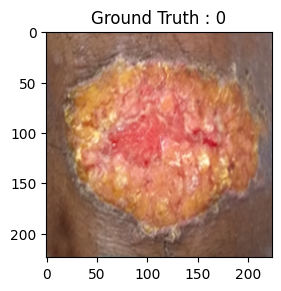

In [ ]:
plt.subplot(121)
plt.imshow(train_X[0, :, :])
plt.title("Ground Truth : {}".format(train_Y[0]))
plt.show()

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')


In [ ]:
# Procesamos el valor de los pixeles y lo normalizamos para que tengan un valor entre 0 y 1, por eso dividimos en
# 255.
train_X = train_X / 255.
test_X = test_X / 255.
#val_X = val_X / 255.

In [ ]:
train_Y = train_Y.astype('float32')
test_Y  = test_Y.astype('float32')
#val_Y  = val_Y.astype('float32')

## Modelo Base

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split



# Número de pliegues para la validación cruzada
num_folds = 5

# Inicializa el validador cruzado
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Variables para almacenar resultados
acc_per_fold = []
loss_per_fold = []

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Realiza la validación cruzada
fold_no = 1
for train, test in kf.split(train_X, train_Y):
    # Crear el modelo
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, input_dim=train_X.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo en este pliegue con Early Stopping
    history = model.fit(
        train_X[train],
        train_Y[train],
        epochs=50,  # Puedes ajustar este número según tu necesidad
        validation_data=(train_X[test], train_Y[test]),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluar el modelo en el conjunto de prueba de este pliegue
    scores = model.evaluate(train_X[test], train_Y[test], verbose=0)

    # Almacenar los resultados
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Imprimir métricas de este pliegue
    print(f"Fold {fold_no} - Loss: {scores[0]:.2f} - Accuracy: {scores[1]*100:.2f}%")

    fold_no += 1

# Imprimir resultados finales
print(f"\nAccuracy: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)")
print(f"Loss: {np.mean(loss_per_fold):.2f}")


Epoch 1/50


KeyboardInterrupt: ignored

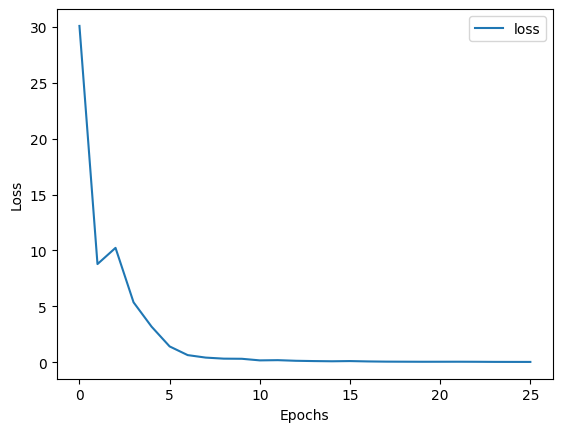

In [ ]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
from joblib import dump, load
dump(model, 'CNN_base_model.joblib')

['CNN_base_model.joblib']

Busqueda de hiperparametros

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Número de pliegues para la validación cruzada
num_folds = 5

# Inicializa el validador cruzado
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Lista de opciones de activación
activation_options = ['relu', 'elu', 'sigmoid']

# Definir la función para construir el modelo con hiperparámetros ajustables
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Choice('filters', values=[16]),
        kernel_size=hp.Choice('kernel_size', values=[3]),
        activation=hp.Choice('relu', values=activation_options),
        input_shape=(224, 224, 3)
    ))

    # Capa Flatten para aplanar los datos
    model.add(Flatten())

    # Capa densa 1
    model.add(Dense(
        units=hp.Choice('units1', values=[64]),
        activation=hp.Choice('activation1', values=activation_options)
    ))

    # Capa de salida con activación 'sigmoid' para clasificación binaria
    model.add(Dense(1, activation='sigmoid'))

    # Optimizador con tasa de aprendizaje ajustable
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.001]))

    # Compilar el modelo
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model
# Instancia del sintonizador
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Reducido el número de combinaciones de hiperparámetros
    executions_per_trial=1,
    directory='my_dir',
    project_name='my_cnn_tuner'
)

# Realiza la búsqueda de hiperparámetros con validación cruzada y early stopping
for train, test in kf.split(train_X, train_Y):
    tuner.search(x=train_X[train], y=train_Y[train], epochs=100, validation_data=(train_X[test], train_Y[test]), callbacks=[early_stopping])

# Obtiene los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Construir el modelo con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hps)

# Imprimir los mejores hiperparámetros
print('--- Mejores hiperparámetros ---')
print(f"filters: {best_hps.get('filters')}")
print(f"kernel_size: {best_hps.get('kernel_size')}")
print(f"Units1: {best_hps.get('units1')}")
print(f"Activation1: {best_hps.get('activation1')}")
#print(f"Units2: {best_hps.get('units2')}")
#print(f"Activation2: {best_hps.get('activation2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Trial 18 Complete [00h 03m 33s]
val_accuracy: 0.6176470518112183

Best val_accuracy So Far: 0.8529411554336548
Total elapsed time: 00h 43m 02s
--- Mejores hiperparámetros ---
filters: 16
kernel_size: 3
Units1: 64
Activation1: elu
Learning Rate: 0.0001


In [ ]:
# Imprimir los detalles del mejor modelo
print("Mejor modelo:")
print(best_model.summary())  # Imprimir el resumen del modelo
print("Hiperparámetros utilizados:")
print(best_model.get_config())  # Imprimir la configuración del modelo

Mejor modelo:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 flatten_1 (Flatten)         (None, 788544)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                50466880  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 50467393 (192.52 MB)
Trainable params: 50467393 (192.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Hiperparámetros utilizados:
{'name': 'sequential_1', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'con

In [ ]:
    # Entrenar el modelo en este pliegue con Early Stopping
    history = best_model.fit(
        train_X[train],
        train_Y[train],
        epochs=100,# Puedes ajustar este número según tu necesidad
        #batch_size=160,
        validation_data=(train_X[test], train_Y[test]),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluar el modelo en el conjunto de prueba de este pliegue
    scores = best_model.evaluate(train_X[test], train_Y[test], verbose=0)

    # Almacenar los resultados
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Imprimir métricas de este pliegue
    print(f"Fold {fold_no} - Loss: {scores[0]:.2f} - Accuracy: {scores[1]*100:.2f}%")

    fold_no += 1

# Imprimir resultados finales
print(f"\nAccuracy: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)")
print(f"Loss: {np.mean(loss_per_fold):.2f}")

Epoch 1/100
5/5 [==============================] - 4s 713ms/step - loss: 9.6015 - accuracy: 0.5407 - val_loss: 1.1971 - val_accuracy: 0.3636
Epoch 2/100
5/5 [==============================] - 2s 438ms/step - loss: 1.1951 - accuracy: 0.3778 - val_loss: 1.2193 - val_accuracy: 0.3636
Epoch 3/100
5/5 [==============================] - 2s 426ms/step - loss: 1.1934 - accuracy: 0.3778 - val_loss: 1.2100 - val_accuracy: 0.3636
Epoch 4/100
5/5 [==============================] - 2s 424ms/step - loss: 1.1841 - accuracy: 0.3778 - val_loss: 1.2001 - val_accuracy: 0.3636
Epoch 5/100
5/5 [==============================] - 2s 459ms/step - loss: 1.1744 - accuracy: 0.3778 - val_loss: 1.1897 - val_accuracy: 0.3636
Epoch 6/100
5/5 [==============================] - 2s 467ms/step - loss: 1.1644 - accuracy: 0.3778 - val_loss: 1.1788 - val_accuracy: 0.3636
Epoch 7/100
5/5 [==============================] - 2s 458ms/step - loss: 1.1537 - accuracy: 0.3778 - val_loss: 1.1681 - val_accuracy: 0.3636
Epoch 8/100
5

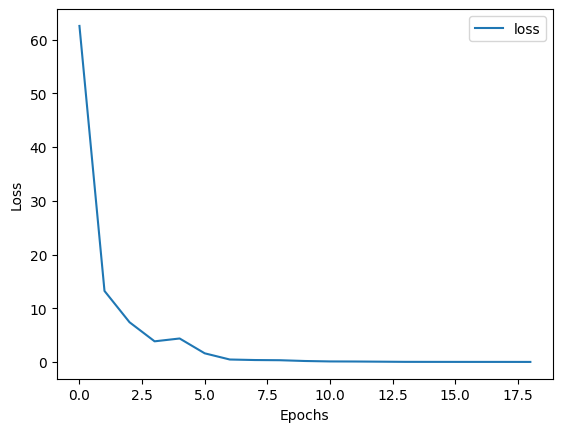

In [ ]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Tranferencia de aprendizaje -VGG-16

In [ ]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.applications import VGG16

#definir la arquitectura
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Número de pliegues para la validación cruzada
num_folds = 5

# Inicializa el validador cruzado
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Mejores hiperparámetros obtenidos
best_hps = {
    'units1': 64,
    'activation1': 'elu'
}

# Inicializar listas para almacenar resultados por pliegue
acc_per_fold = []
loss_per_fold = []

# Iterar sobre los pliegues
fold_no = 1
for train, test in kf.split(train_X, train_Y):
    # Construir el modelo
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    # Congelar las capas convolucionales del modelo base
    for layer in base_model.layers:
        if 'conv' in layer.name:
            layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo en este pliegue con Early Stopping
    history = model.fit(
        train_X[train],
        train_Y[train],
        epochs=50,  # Puedes ajustar este número según tu necesidad
        validation_data=(train_X[test], train_Y[test]),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluar el modelo en el conjunto de prueba de este pliegue
    scores = model.evaluate(train_X[test], train_Y[test], verbose=0)

    # Almacenar los resultados
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Imprimir métricas de este pliegue
    print(f"Fold {fold_no} - Loss: {scores[0]:.2f} - Accuracy: {scores[1]*100:.2f}%")

    fold_no += 1

# Imprimir resultados finales
print(f"\nAccuracy: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)")
print(f"Loss: {np.mean(loss_per_fold):.2f}")


<ipython-input-11-8bf73341cadd>:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
4/4 [==============================] - 23s 6s/step - loss: 1.0490 - accuracy: 0.4359 - val_loss: 0.9601 - val_accuracy: 0.5667
Epoch 2/50
4/4 [==============================] - 21s 5s/step - loss: 1.0222 - accuracy: 0.5726 - val_loss: 0.8088 - val_accuracy: 0.5667
Epoch 3/50
4/4 [==============================] - 20s 5s/step - loss: 0.6312 - accuracy: 0.6496 - val_loss: 0.7169 - val_accuracy: 0.4667
Epoch 4/50
4/4 [==============================] - 21s 5s/step - loss: 0.5788 - accuracy: 0.6496 - val_loss: 0.6512 - val_accuracy: 0.6000
Epoch 5/50
4/4 [==============================] - 21s 5s/step - loss: 0.4920 - accuracy: 0.7436 - val_loss: 0.7156 - val_accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 21s 5s/step - loss: 0.3834 - accuracy: 0.8291 - val_loss: 0.4695 - val_accuracy: 0.8000
Epoch 7/50
4/4 [==============================] - 21s 5s/step - loss: 0.3655 - accuracy: 0.8547 - val_loss:

In [ ]:
model.save('Vgg16_base_convertido.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Estimación VGG16

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.applications import VGG16

# Define la función para crear el modelo
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    # Hiperparámetros a sintonizar
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    hp_activation = hp.Choice('activation', values=['relu', 'elu ', 'tanh'])

    model.add(Dense(units=hp_units, activation=hp_activation))
    model.add(Dense(1, activation='sigmoid'))

    # Congelar las capas convolucionales del modelo base
    for layer in base_model.layers:
        if 'conv' in layer.name:
            layer.trainable = False

    # Optimizador con tasa de aprendizaje ajustable
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.001]))

    # Compilar el modelo
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Número de pliegues para la validación cruzada
num_folds = 5

# Inicializa el validador cruzado
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Inicializar listas para almacenar resultados por pliegue
acc_per_fold = []
loss_per_fold = []

# Iterar sobre los pliegues
fold_no = 1
for train, test in kf.split(train_X, train_Y):
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=10,
        executions_per_trial=1,
        directory='my_dir',
        project_name='vgg_tuning'
    )

    tuner.search(train_X[train], train_Y[train], epochs=50, validation_data=(train_X[test], train_Y[test]), callbacks=[early_stopping])

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    model = tuner.hypermodel.build(best_hps)
    history = model.fit(train_X[train], train_Y[train], epochs=50, validation_data=(train_X[test], train_Y[test]), callbacks=[early_stopping])

    scores = model.evaluate(train_X[test], train_Y[test], verbose=0)

    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    print(f"Fold {fold_no} - Loss: {scores[0]:.2f} - Accuracy: {scores[1]*100:.2f}%")

    fold_no += 1

print(f"\nAccuracy: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)")
print(f"Loss: {np.mean(loss_per_fold):.2f}")

Trial 10 Complete [00h 13m 08s]
val_accuracy: 0.9333333373069763

Best val_accuracy So Far: 0.9666666388511658
Total elapsed time: 01h 31m 47s
Epoch 1/50
4/4 [==============================] - 15s 4s/step - loss: 0.9586 - accuracy: 0.5299 - val_loss: 1.4019 - val_accuracy: 0.5667
Epoch 2/50
4/4 [==============================] - 14s 4s/step - loss: 0.9019 - accuracy: 0.6068 - val_loss: 0.6355 - val_accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 14s 4s/step - loss: 0.6115 - accuracy: 0.7179 - val_loss: 0.5424 - val_accuracy: 0.7667
Epoch 4/50
4/4 [==============================] - 16s 4s/step - loss: 0.4488 - accuracy: 0.7949 - val_loss: 0.7014 - val_accuracy: 0.6000
Epoch 5/50
4/4 [==============================] - 15s 4s/step - loss: 0.4057 - accuracy: 0.8291 - val_loss: 0.4698 - val_accuracy: 0.7667
Epoch 6/50
4/4 [==============================] - 15s 4s/step - loss: 0.3351 - accuracy: 0.8718 - val_loss: 0.4447 - val_accuracy: 0.8333
Epoch 7/50
4/4 [=============

## Tranferencia de aprendizaje VGG-19

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.applications import VGG19

#definir la arquitectura
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Número de pliegues para la validación cruzada
num_folds = 5

# Inicializa el validador cruzado
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Mejores hiperparámetros obtenidos
best_hps = {
    'units1': 64,
    'activation1': 'elu'
}

# Inicializar listas para almacenar resultados por pliegue
acc_per_fold = []
loss_per_fold = []

# Iterar sobre los pliegues
fold_no = 1
for train, test in kf.split(train_X, train_Y):
    # Construir el modelo
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    # Congelar las capas convolucionales del modelo base
    for layer in base_model.layers:
        if 'conv' in layer.name:
            layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo en este pliegue con Early Stopping
    history = model.fit(
        train_X[train],
        train_Y[train],
        epochs=50,  # Puedes ajustar este número según tu necesidad
        validation_data=(train_X[test], train_Y[test]),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluar el modelo en el conjunto de prueba de este pliegue
    scores = model.evaluate(train_X[test], train_Y[test], verbose=0)

    # Almacenar los resultados
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Imprimir métricas de este pliegue
    print(f"Fold {fold_no} - Loss: {scores[0]:.2f} - Accuracy: {scores[1]*100:.2f}%")

    fold_no += 1

# Imprimir resultados finales
print(f"\nAccuracy: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)")
print(f"Loss: {np.mean(loss_per_fold):.2f}")


Epoch 1/50
4/4 [==============================] - 27s 7s/step - loss: 1.1885 - accuracy: 0.4103 - val_loss: 1.2947 - val_accuracy: 0.5667
Epoch 2/50
4/4 [==============================] - 26s 7s/step - loss: 0.9771 - accuracy: 0.5897 - val_loss: 0.5772 - val_accuracy: 0.7667
Epoch 3/50
4/4 [==============================] - 26s 7s/step - loss: 0.6777 - accuracy: 0.6410 - val_loss: 0.5459 - val_accuracy: 0.7333
Epoch 4/50
4/4 [==============================] - 27s 7s/step - loss: 0.4575 - accuracy: 0.7778 - val_loss: 0.8724 - val_accuracy: 0.5667
Epoch 5/50
4/4 [==============================] - 26s 7s/step - loss: 0.5212 - accuracy: 0.7350 - val_loss: 0.5107 - val_accuracy: 0.7333
Epoch 6/50
4/4 [==============================] - 26s 7s/step - loss: 0.4121 - accuracy: 0.8205 - val_loss: 0.4930 - val_accuracy: 0.7333
Epoch 7/50
4/4 [==============================] - 26s 7s/step - loss: 0.3489 - accuracy: 0.8547 - val_loss: 0.5456 - val_accuracy: 0.7000
Epoch 8/50
4/4 [==================

## Estimación Vgg19

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.applications import VGG19

# Define la función para crear el modelo
def build_model(hp):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    # Hiperparámetros a sintonizar
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    hp_activation = hp.Choice('activation', values=['relu', 'sigmoid ', 'tanh'])

    model.add(Dense(units=hp_units, activation=hp_activation))
    model.add(Dense(1, activation='sigmoid'))

    # Congelar las capas convolucionales del modelo base
    for layer in base_model.layers:
        if 'conv' in layer.name:
            layer.trainable = False

    # Optimizador con tasa de aprendizaje ajustable
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.001]))

    # Compilar el modelo
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Número de pliegues para la validación cruzada
num_folds = 5

# Inicializa el validador cruzado
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Inicializar listas para almacenar resultados por pliegue
acc_per_fold = []
loss_per_fold = []

# Iterar sobre los pliegues
fold_no = 1
for train, test in kf.split(train_X, train_Y):
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=10,
        executions_per_trial=1,
        directory='my_dir',
        project_name='vgg_tuning'
    )

    tuner.search(train_X[train], train_Y[train], epochs=50, validation_data=(train_X[test], train_Y[test]), callbacks=[early_stopping])

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    model = tuner.hypermodel.build(best_hps)
    history = model.fit(train_X[train], train_Y[train], epochs=50, validation_data=(train_X[test], train_Y[test]), callbacks=[early_stopping])

    scores = model.evaluate(train_X[test], train_Y[test], verbose=0)

    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    print(f"Fold {fold_no} - Loss: {scores[0]:.2f} - Accuracy: {scores[1]*100:.2f}%")

    fold_no += 1

print(f"\nAccuracy: {np.mean(acc_per_fold):.2f}% (+/- {np.std(acc_per_fold):.2f}%)")
print(f"Loss: {np.mean(loss_per_fold):.2f}")

Trial 10 Complete [00h 00m 01s]

Best val_accuracy So Far: 0.8999999761581421
Total elapsed time: 02h 13m 44s
Epoch 1/50
4/4 [==============================] - 27s 7s/step - loss: 0.8000 - accuracy: 0.4786 - val_loss: 0.8427 - val_accuracy: 0.5667
Epoch 2/50
4/4 [==============================] - 26s 7s/step - loss: 0.6092 - accuracy: 0.6581 - val_loss: 0.6524 - val_accuracy: 0.5333
Epoch 3/50
4/4 [==============================] - 25s 7s/step - loss: 0.5881 - accuracy: 0.7607 - val_loss: 0.5983 - val_accuracy: 0.7000
Epoch 4/50
4/4 [==============================] - 26s 7s/step - loss: 0.4872 - accuracy: 0.7607 - val_loss: 0.6393 - val_accuracy: 0.6333
Epoch 5/50
4/4 [==============================] - 26s 7s/step - loss: 0.4499 - accuracy: 0.7949 - val_loss: 0.5451 - val_accuracy: 0.8000
Epoch 6/50
4/4 [==============================] - 26s 7s/step - loss: 0.4091 - accuracy: 0.7949 - val_loss: 0.5619 - val_accuracy: 0.7333
Epoch 7/50
4/4 [==============================] - 25s 7s/step 

In [ ]:
from joblib import dump, load
dump(model, 'VGG19_estimada_model.joblib')

['VGG19_estimada_model.joblib']

In [ ]:
from joblib import dump, load
dump(model, 'VGG19_model.joblib')

['VGG19_model.joblib']